# Basit Doğrusal Regresyon (Simple Lineer Regression)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [3]:
data_SLR=pd.read_csv("dogrusal_regresyon_veriseti_20220209.csv",sep=";")
x=data_SLR.deneyim.values.reshape(-1,1)
y=data_SLR.maas.values.reshape(-1,1)

Text(0.5, 1.0, 'Deneyim Maaş İlişkisi')

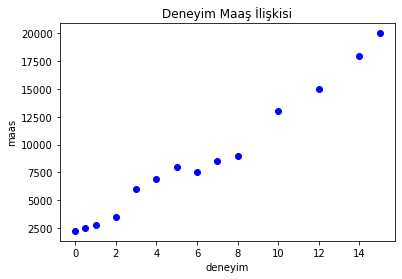

In [4]:
mp.scatter(data_SLR.deneyim,data_SLR.maas,color="blue")
mp.xlabel("deneyim")
mp.ylabel("maas")
mp.title("Deneyim Maaş İlişkisi")

In [39]:
lr=LinearRegression()
lr.fit(x,y)
tahmin=lr.predict(x)

In [40]:
#hesaplanan doğrusallığın y eksenini kestiği nokta
y_eksen=np.array([0]).reshape(-1,1)
b0=lr.predict(y_eksen)
print(f"Y eksenini kestiği nokta : {b0}")
#intercept i
b0_=lr.intercept_
print(f"Y ekseni intercept'i : {b0_}")
# Eğimi (slope)
b0_s=lr.coef_
print(f"Doğrunun Eğimi (slope) :{b0_s}")

Y eksenini kestiği nokta : [[1663.89519747]]
Y ekseni intercept'i : [1663.89519747]
Doğrunun Eğimi (slope) :[[1138.34819698]]


Text(0.5, 1.0, 'Deneyim Maaş İlişkisi')

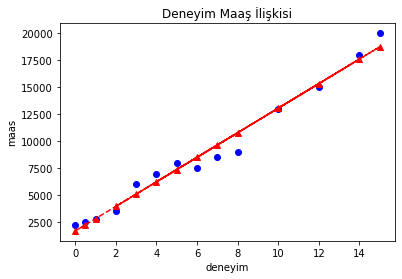

In [41]:
mp.figure()
mp.scatter(data_SLR.deneyim,data_SLR.maas,color="blue")
mp.plot(x,tahmin,"r^--")
mp.xlabel("deneyim")
mp.ylabel("maas")
mp.title("Deneyim Maaş İlişkisi")

In [42]:
gerçek_deger=data_SLR.iloc[:,1]
gerçek_deger=pd.DataFrame(gerçek_deger)
tahmin=pd.DataFrame(tahmin)
sonuc=pd.concat([gerçek_deger,tahmin],axis=1)
sonuc.columns=["Gerçek_Değerler","Tahmin_Edilen_Değerler"]

In [43]:
sonuc=sonuc.sort_values("Gerçek_Değerler")
sonuc

,Gerçek_Değerler,Tahmin_Edilen_Değerler
1,2250,1663.895197
0,2500,2233.069296
2,2750,2802.243394
9,3500,3940.591591
8,6000,5078.939788
5,6900,6217.287985
13,7500,8493.984379
3,8000,7355.636182
7,8500,9632.332576
4,9000,10770.680773


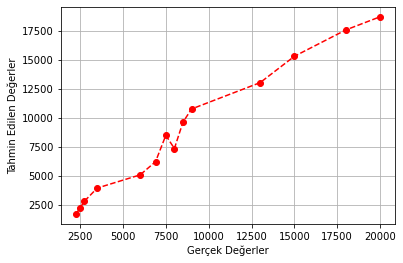

In [44]:
mp.figure()
mp.plot(sonuc.Gerçek_Değerler,sonuc.Tahmin_Edilen_Değerler,"ro--")
mp.xlabel("Gerçek Değerler")
mp.ylabel("Tahmin Edilen Değerler")
mp.grid(True)

# Çoklu Doğrusal Regresyon(Multiple Lineer Regression)

In [45]:
data_MLR=pd.read_csv("coklu_dogrusal_regresyon_veriseti_20220209.csv",sep=";")

In [46]:
data_MLR

,deneyim,maas,yas
0,0.5,2500,22
1,0.0,2250,21
2,1.0,2750,23
3,5.0,8000,25
4,8.0,9000,28
5,4.0,6900,23
6,15.0,20000,35
7,7.0,8500,29
8,3.0,6000,22
9,2.0,3500,23


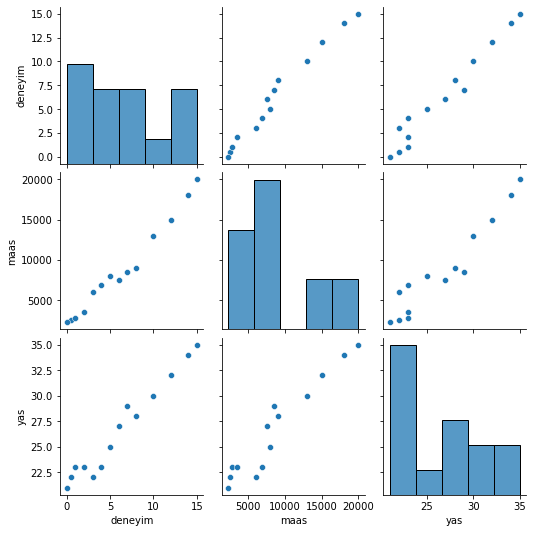

In [47]:
sbn.pairplot(data_MLR)

In [48]:
data_MLR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   deneyim  14 non-null     float64
 1   maas     14 non-null     int64  
 2   yas      14 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 464.0 bytes


In [49]:
data_MLR.corr()

,deneyim,maas,yas
deneyim,1.000000,0.988700,0.981464
maas,0.988700,1.000000,0.957791
yas,0.981464,0.957791,1.000000


In [50]:
x_mlr=data_MLR.iloc[:,[0,2]].values
y_mlr=data_MLR.iloc[:,1].values
y_mlr=y_mlr.reshape(-1,1)



In [51]:
mlr=LinearRegression()
mlr.fit(x_mlr,y_mlr)
tahmin_mlr=mlr.predict(x_mlr)

In [52]:
y_mlr=pd.DataFrame(y_mlr)
tahmin_mlr=pd.DataFrame(tahmin_mlr)
sonuc_mlr=pd.concat([y_mlr,tahmin_mlr],axis=1)
sonuc_mlr.columns=["Gerçek_Değerler","Tahmin_Edilen_Değerler"]

In [53]:
sonuc_mlr=sonuc_mlr.sort_values("Gerçek_Değerler")
sonuc_mlr

,Gerçek_Değerler,Tahmin_Edilen_Değerler
1,2250,1625.461561
0,2500,1971.489735
2,2750,2317.517909
9,3500,3843.018630
8,6000,5785.241536
5,6900,6894.020071
13,7500,8278.132767
3,8000,7586.076419
7,8500,8970.189115
4,9000,10912.412021


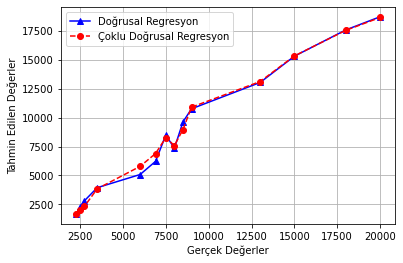

In [54]:
mp.figure()
mp.plot(sonuc.Gerçek_Değerler,sonuc.Tahmin_Edilen_Değerler,"b^-",label="Doğrusal Regresyon")
mp.plot(sonuc_mlr.Gerçek_Değerler,sonuc_mlr.Tahmin_Edilen_Değerler,"ro--",label="Çoklu Doğrusal Regresyon")
mp.xlabel("Gerçek Değerler")
mp.ylabel("Tahmin Edilen Değerler")
mp.grid(True)
mp.legend()

# Polinom Regresyon (Polinomial Regression)

In [55]:
data_pr=pd.read_csv("polinomsal_regresyon_veriseti_20220209.csv",sep=";")

In [56]:
data_pr

,araba_fiyat,araba_max_hiz
0,60,180
1,70,180
2,80,200
3,100,200
4,120,200
5,150,220
6,200,240
7,250,240
8,300,300
9,400,350


In [57]:
data_pr.corr()

,araba_fiyat,araba_max_hiz
araba_fiyat,1.000000,0.688899
araba_max_hiz,0.688899,1.000000


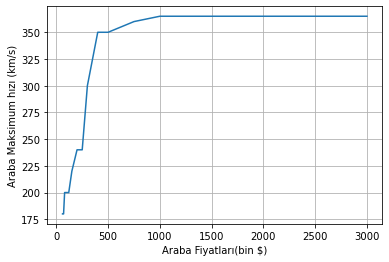

In [58]:
mp.figure()
mp.plot(data_pr.araba_fiyat,data_pr.araba_max_hiz)
mp.xlabel("Araba Fiyatları(bin $)")
mp.ylabel("Araba Maksimum hızı (km/s)")
mp.grid(True)

In [59]:
x_pr=data_pr.araba_fiyat.values.reshape(-1,1)
y_pr=data_pr.araba_max_hiz.values.reshape(-1,1)

In [60]:
pr=PolynomialFeatures(degree=3)
pr_4=PolynomialFeatures(degree=4)
x_poly=pr.fit_transform(x_pr)
x_poly_4=pr_4.fit_transform(x_pr)
plr=LinearRegression()
plr_4=LinearRegression()
plr.fit(x_poly,y_pr)
plr_4.fit(x_poly_4,y_pr)
tahmin_pr=plr.predict(x_poly)
tahmin_pr_4=plr_4.predict(x_poly_4)

In [61]:
y_pr=pd.DataFrame(y_pr)
tahmin_pr=pd.DataFrame(tahmin_pr)
tahmin_pr_4=pd.DataFrame(tahmin_pr_4)
sonuc_pr=pd.concat([y_pr,tahmin_pr,tahmin_pr_4],axis=1)
sonuc_pr.columns=["Gerçek_Değerler","Tahmin_Edilen_Değerler(3.derece)","Tahmin_Edilen_Değerler(4.derece)"]
sonuc_pr

,Gerçek_Değerler,Tahmin_Edilen_Değerler(3.derece),Tahmin_Edilen_Değerler(4.derece)
0,180,184.366289,172.485889
1,180,188.919073,179.019708
2,200,193.411774,185.403180
3,200,202.218290,197.727311
4,200,210.788573,209.474614
5,220,223.207037,226.049240
6,240,242.762035,251.015045
7,240,260.926000,272.866356
8,300,277.741647,291.836831
9,350,307.498850,322.030022


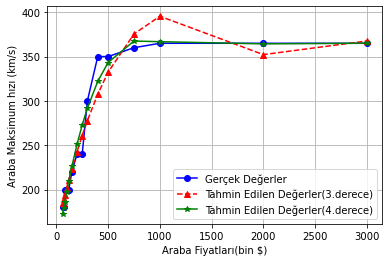

In [62]:
mp.figure()

mp.plot(data_pr.araba_fiyat,data_pr.araba_max_hiz,"bo-",label="Gerçek Değerler")
mp.plot(data_pr.araba_fiyat,sonuc_pr.iloc[:,1],"r^--",label="Tahmin Edilen Değerler(3.derece)")
mp.plot(data_pr.araba_fiyat,sonuc_pr.iloc[:,2],"g*-",label="Tahmin Edilen Değerler(4.derece)")
mp.xlabel("Araba Fiyatları(bin $)")
mp.ylabel("Araba Maksimum hızı (km/s)")
mp.grid(True)
mp.legend()


In [63]:
r2_slr=r2_score(y,tahmin)
r2_mlr=r2_score(y_mlr,tahmin_mlr)
r2_pr=r2_score(y_pr,tahmin_pr)
r2_pr4=r2_score(y_pr,tahmin_pr_4)

In [64]:
print(f"Basit Doğrusal Regresyon R kare :{r2_slr}")
print(f"Çoklu Doğrusal Regresyon R kare :{r2_mlr}")
print(f"Polinnom Regresyon(3. derece) R kare :{r2_pr}")
print(f"Polinnom Regresyon(4. derece) R kare :{r2_pr4}")

Basit Doğrusal Regresyon R kare :0.9775283164949902
Çoklu Doğrusal Regresyon R kare :0.9818393838730448
Polinnom Regresyon(3. derece) R kare :0.9442498220803439
Polinnom Regresyon(4. derece) R kare :0.9694743023211779
